In [1]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature


/Users/ph290/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    cube_region = cube_region_tmp.intersection(latitude=(lat_south, lat_north))
    return cube_region

In [3]:
# file = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5_1989.nc'
file = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5_2002.nc'

In [4]:
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_19890101.nc','sea_surface_temperature')[0]
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_1989.nc','sea_surface_temperature')
obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_2002.nc','sea_surface_temperature')

/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [5]:
obs_cube = obs_cube[0]

In [6]:
# cube = iris.load_cube(file)[0]

cube = iris.load_cube(file)
cube = cube.collapsed('time',iris.analysis.MEAN)

/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'time'.
  warnings.warn(msg.format(self.name()))


In [7]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

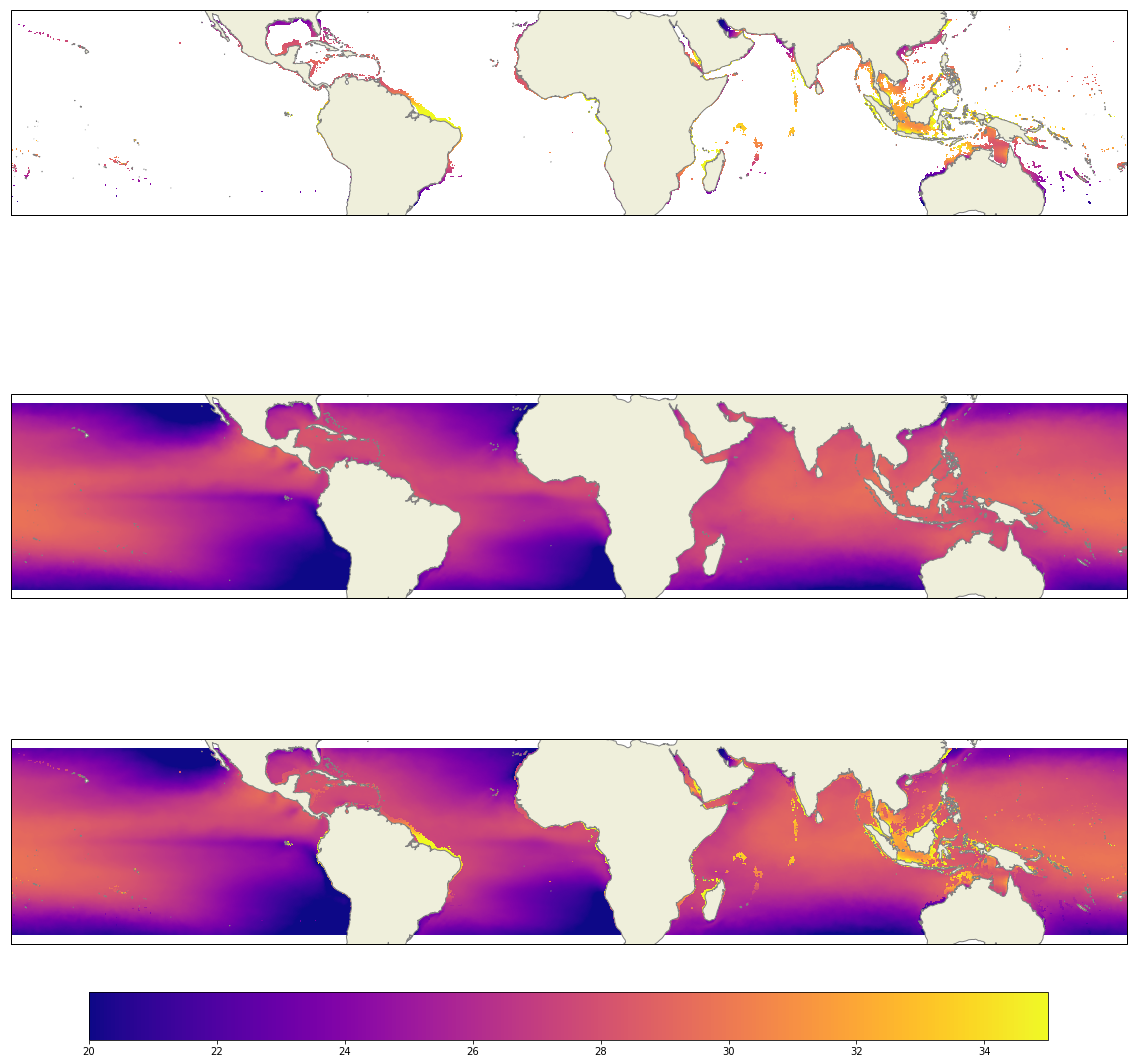

In [8]:
cube_0 = cube.copy()
cube_0_data = cube_0.data
lat = cube_0.coord('latitude').points
lon = cube_0.coord('longitude').points

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+180, lat,cube_0_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

#########

lon_west = -180
lon_east = 180
lat_south = -30.0
lat_north = 30.0

obs_cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

obs_cube_data = obs_cube_region.data
lat2 = obs_cube_region.coord('latitude').points
lon2 = obs_cube_region.coord('longitude').points

ax = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon2, lat2,obs_cube_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

####

ax = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree())

p = ax.pcolormesh(lon2, lat2,obs_cube_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
p = ax.pcolormesh(lon+180, lat,cube_0_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

# plt.gca().coastlines('10m')
plt.colorbar(p,orientation='horizontal')
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/figures/global_s2p3.png')
plt.show()

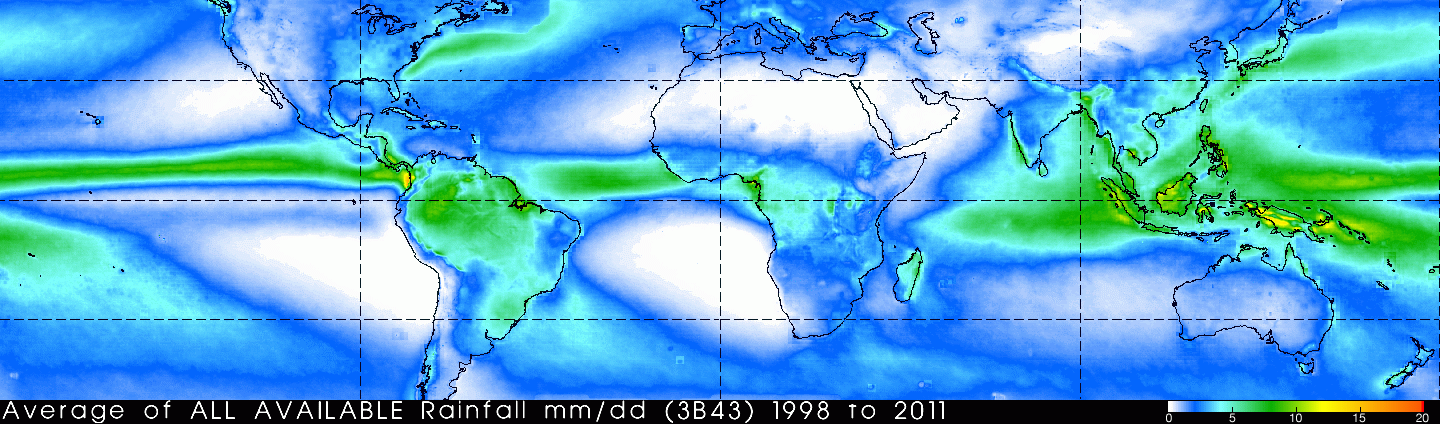

In [9]:

from IPython.display import Image
Image(filename='/Users/ph290/Downloads/global_tropics/TRMM.png') 

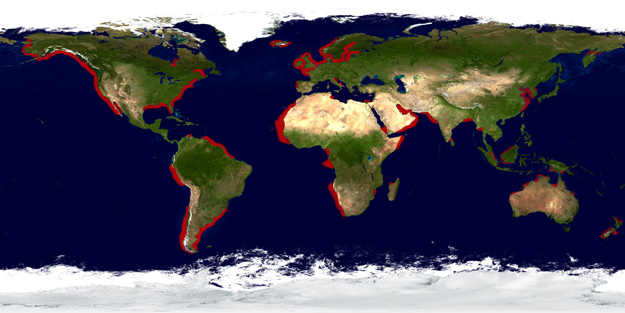

In [10]:
from IPython.display import Image
Image(filename='/Users/ph290/Downloads/global_tropics/EarthMap_upwelling_red.jpg') 

The SSTs seem to be overestimated where there is high precip. I hypothesis that this is due to the model not being able to loose enough heat (and maybe gaining too much heat) where there is high levels of high cloud. I plan to address this be prescribing aspects of the surface radiation from the forcing dataset rather than allwing s2p3 to calcuate these thinsg based on cloud amount.

### Note, satilite SST is night time, model is daily mean

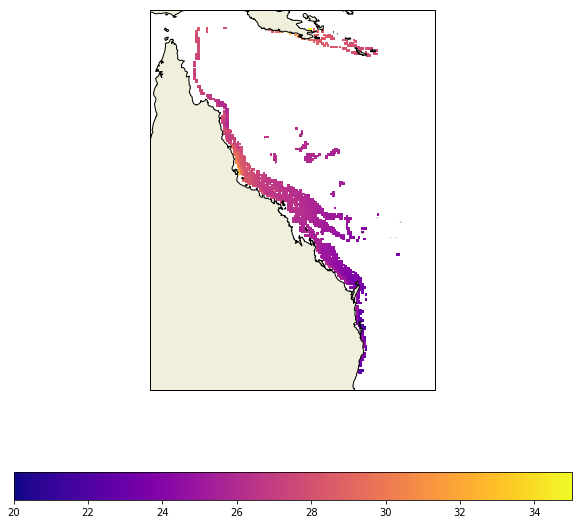

In [11]:
lon_west = 142.0+180
lon_east = 157.0+180
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_10m, edgecolor='k')

plt.colorbar(p,orientation='horizontal')

/Users/ph290/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


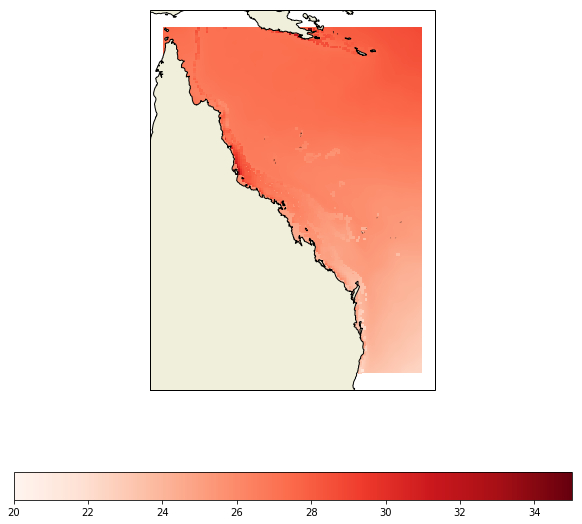

In [12]:
lon_west = 142+360.0
lon_east = 157+360.0
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(obs_cube.copy(),lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+360, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)

lon_west = 142.0+180
lon_east = 157.0+180
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')

plt.colorbar(p,orientation='horizontal')

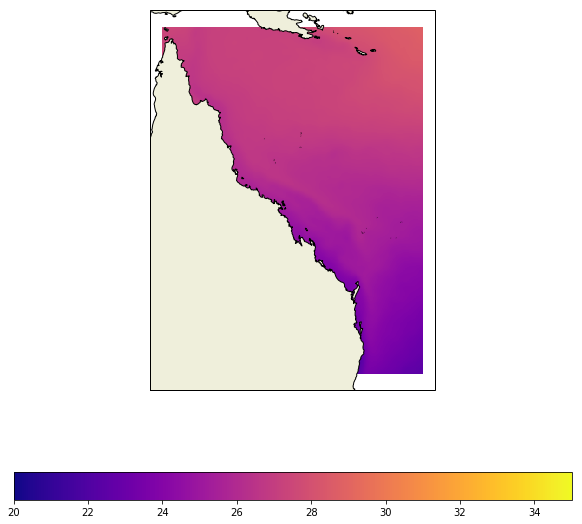

In [13]:
lon_west = 142+360.0
lon_east = 157+360.0
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(obs_cube.copy(),lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+360, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_10m, edgecolor='k')

plt.colorbar(p,orientation='horizontal')

/Users/ph290/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


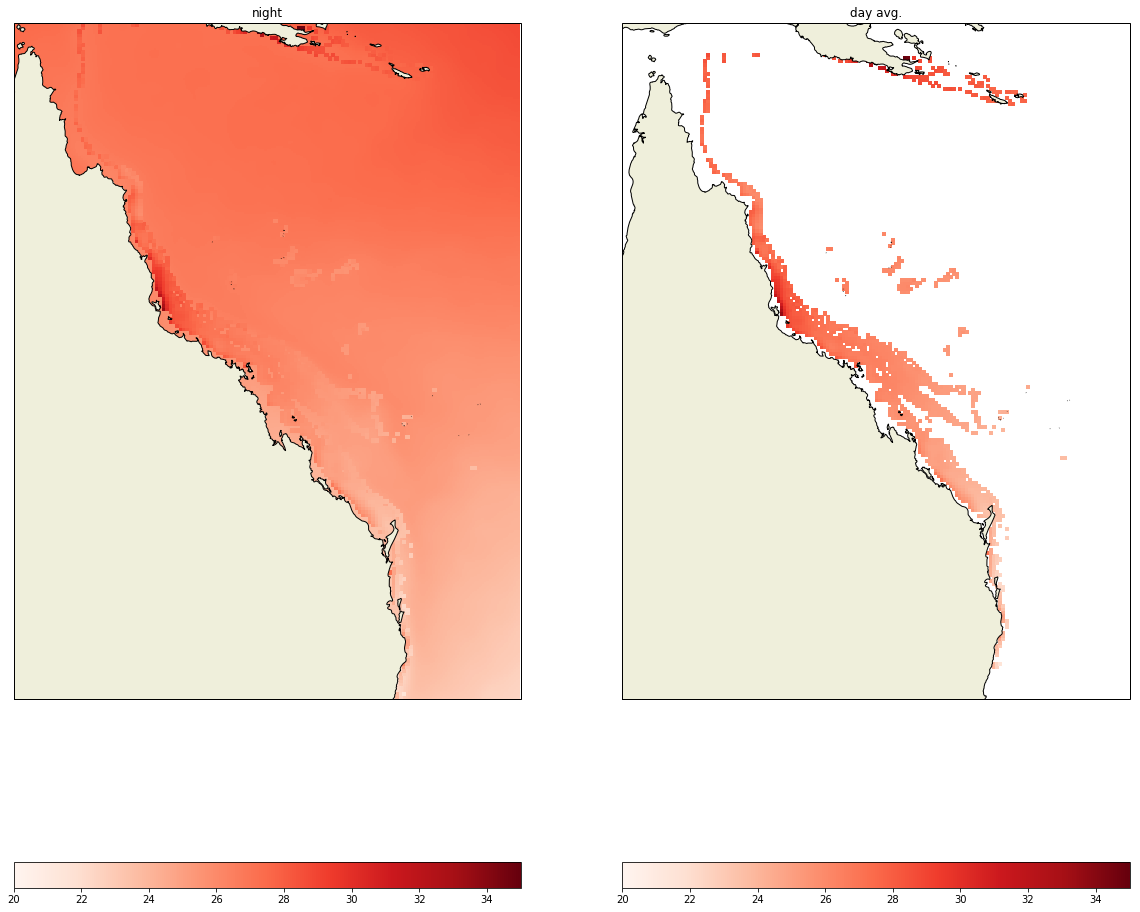

In [14]:
lon_west = 142+360
lon_east = 157+360
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+360, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)

lon_west = 142+180
lon_east = 157+180
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

p = ax.contour(lon+180, lat,cube_region_data,levels=[20],
                transform=ccrs.PlateCarree(),colors='k')



p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')
plt.colorbar(p,orientation='horizontal')

plt.title('night')


####

ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points


p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')

plt.title('day avg.')

plt.colorbar(p,orientation='horizontal')

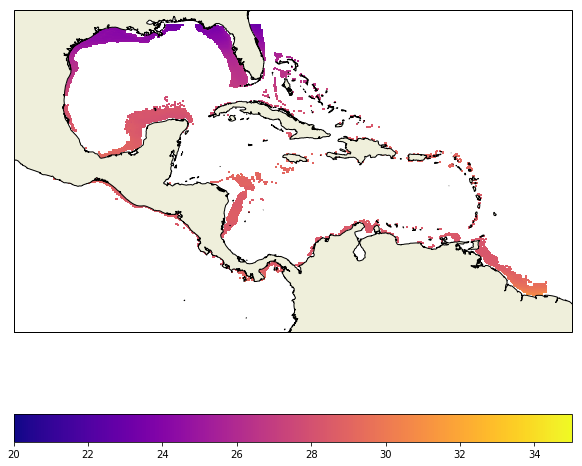

In [15]:
lon_west = -100+180
lon_east = -55+180
lat_south = 4.0
lat_north = 34.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_10m, edgecolor='k')


plt.colorbar(p,orientation='horizontal')
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/figures/caribbean_s2p3.png')
plt.show()


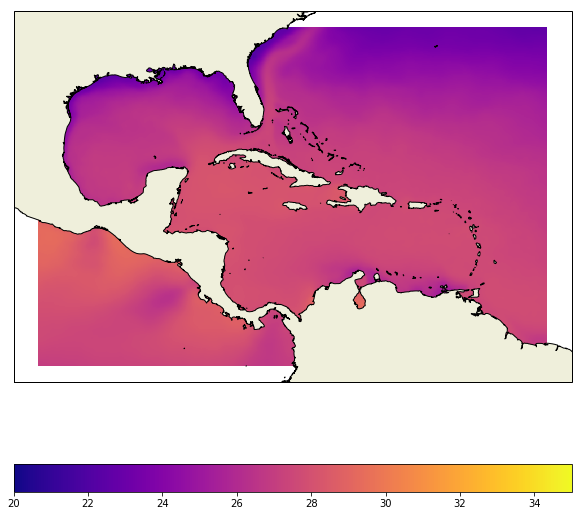

In [16]:
lon_west = -100+360
lon_east = -55+360
lat_south = 4.0
lat_north = 34.0

cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+360, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_10m, edgecolor='k')

plt.colorbar(p,orientation='horizontal')

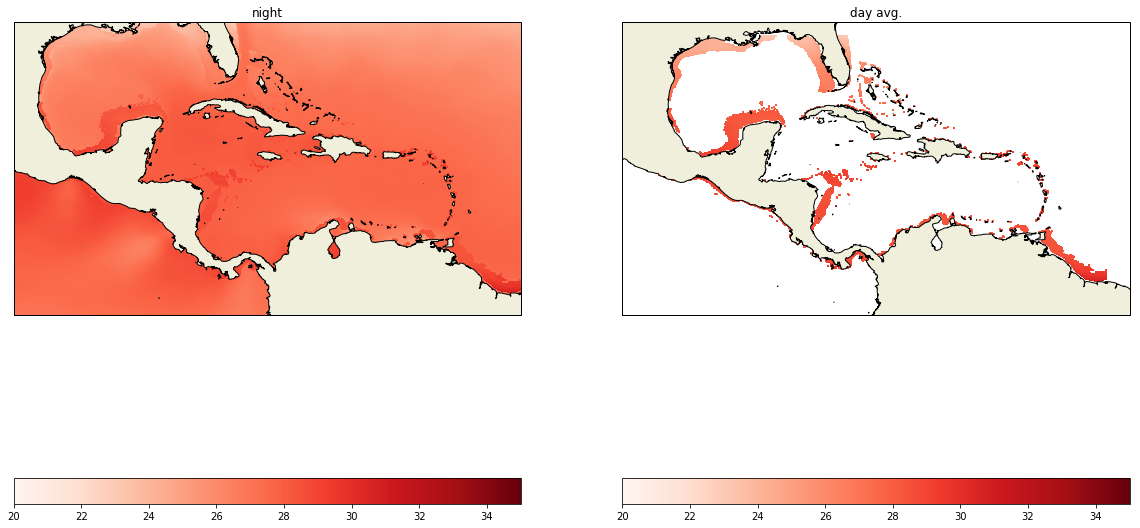

In [17]:
lon_west = -100+360
lon_east = -55+360
lat_south = 4.0
lat_north = 30.0

cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+360, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)

lon_west = -100+180
lon_east = -55+180
lat_south = 4.0
lat_north = 30.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

p = ax.contour(lon+180, lat,cube_region_data,levels=[20],
                transform=ccrs.PlateCarree(),colors='k')



p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')
plt.colorbar(p,orientation='horizontal')

plt.title('night')


####

ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points


p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')

plt.title('day avg.')

plt.colorbar(p,orientation='horizontal')

# Bottom temperatures

In [18]:
file2 = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5_1981.nc'
file3 = '/Users/ph290/Downloads/global_tropics/bottom_temperature_global_tropics_era5_1981.nc'

cube_1981_surf = iris.load_cube(file2)
cube_1981_bott = iris.load_cube(file3)

cube_1981_surf = cube_1981_surf.collapsed('time',iris.analysis.MEAN)
cube_1981_bott = cube_1981_bott.collapsed('time',iris.analysis.MEAN)

In [19]:
cube_0 = cube_1981_surf - cube_1981_bott
cube_0_data = cube_0.data


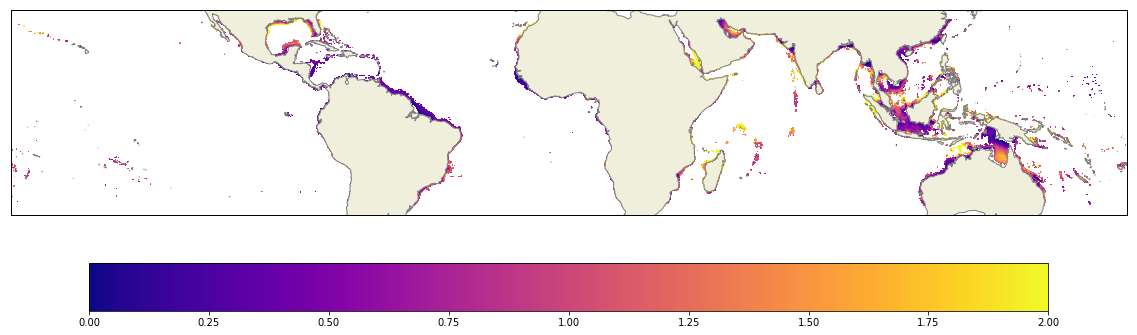

In [20]:
lat = cube_0.coord('latitude').points
lon = cube_0.coord('longitude').points

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+180, lat,cube_0_data,
                transform=ccrs.PlateCarree(),vmin=0,vmax=2,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')
plt.colorbar(p,orientation='horizontal')

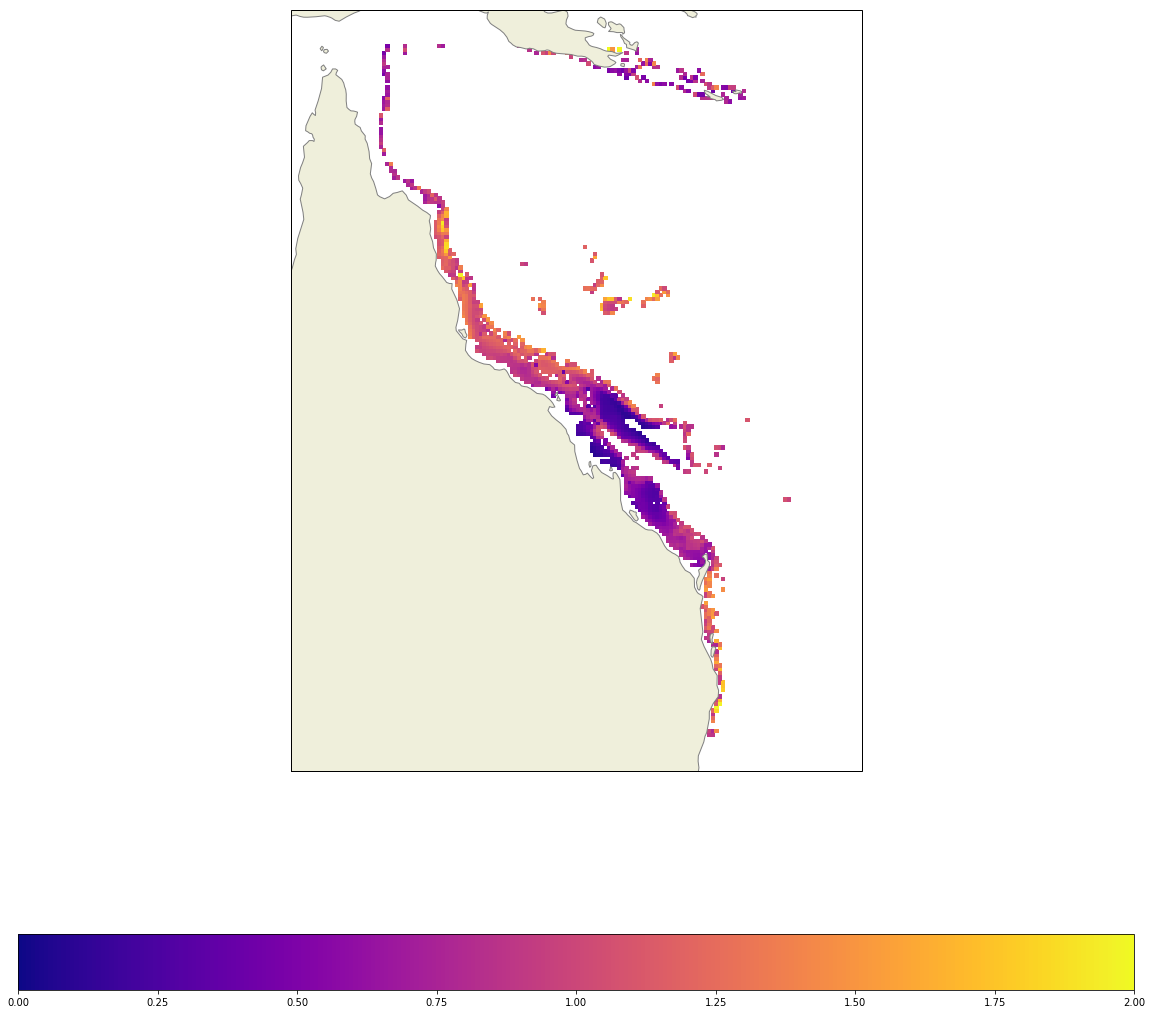

In [24]:
lon_west = 142+180
lon_east = 157+180
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points
cube_region_data = cube_region.data
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=0,vmax=2,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')
plt.colorbar(p,orientation='horizontal')


# Notes

I seemed to have downloade drhum at pressure level 975 rather than 1000 so it does not correspond to the surface, which is what i presumably need for latant heat flux. Re-downloading now

Turbidity absorption, could be parameterised with winds…

Top layer 10-20cm thick would be good - shadow thermocline would be or order 10-20cm. Have it as the same thickness specially 

Coral temp is average of any nighttime data but that should give a reasonable daily avg

CCI is 10am which is a decent daily average

Ongala reck data would be a good one to validate against,

Do runs from mid 2000s - good SST data

1950sish-2100 - 3D 

Need to s2p3 reanalysis back to 1950ish - ERA5 will go to then in a few months.

2002-2006 is William’s best SST data. Do runs from 2000.
William can provide this or can do this - it uses coraltemp4 which has not been released yet

Play with the drag coefficient to make the SSTs look good… then look at the spatial pattern of drag coefficients to think about whether they make physical sense